# Premier League 2024/25 Player Statistics Dataset

## Introduction

This dataset contains detailed statistics for players participating in the Premier League during the 2024/25 season. The data provides insights into various performance metrics, including goals, assists, expected goals, progressive passes, and more. These statistics can be used to analyze individual player contributions, compare player performances across different positions, and evaluate the effectiveness of players both offensively and defensively.

### Dataset Columns:

- **Player**: The name of the player.
- **Nation**: The player's nationality.
- **Pos**: The player's position on the field (e.g., forward, midfielder, defender).
- **Age**: The age of the player during the season.
- **MP (Minutes Played)**: The total number of minutes played by the player.
- **Starts**: The number of matches the player started.
- **Min (Minutes)**: The same as MP, representing the total minutes played.
- **90s (90s Played)**: The equivalent of 90-minute matches played (e.g., 1.5 = 135 minutes).
- **Gls (Goals)**: The total number of goals scored by the player.
- **Ast (Assists)**: The total number of assists made by the player.
- **G+A (Goals + Assists)**: The combined total of goals and assists.
- **G-PK (Goals - Penalty Kicks)**: Goals scored excluding penalty kicks.
- **PK (Penalty Kicks)**: The number of goals scored from penalties.
- **PKatt (Penalty Kicks Attempted)**: The number of penalty kicks attempted.
- **CrdY (Yellow Cards)**: The number of yellow cards received by the player.
- **CrdR (Red Cards)**: The number of red cards received by the player.
- **xG (Expected Goals)**: The expected number of goals based on the player's shots.
- **npxG (Non-Penalty Expected Goals)**: Expected goals excluding penalties.
- **xAG (Expected Assists)**: The expected number of assists based on the player's passes.
- **npxG+xAG (Non-Penalty xG + xAG)**: The total of non-penalty expected goals and expected assists.
- **PrgC (Progressive Carries)**: The number of times the player carried the ball forward.
- **PrgP (Progressive Passes)**: The number of forward-moving passes by the player.
- **PrgR (Progressive Runs)**: The number of times the player made runs forward with the ball.

### Objective

The main objective of this analysis is to perform basic statistical exploration of the dataset. We will cover:

1. **Player Performance Analysis**: Analyzing goals, assists, and expected goals to identify the top performers.
2. **Positional Breakdown**: Comparing performance metrics across different positions (forwards, midfielders, defenders).
3. **Progressive Play Analysis**: Evaluating how players contribute to advancing the ball through progressive carries, passes, and runs.
4. **Discipline Analysis**: Examining yellow and red card data for insights into player discipline.



In [2]:
import numpy as np
import re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/premier-league-all-players-stats-2324/premier-player-23-24.csv


In [3]:
stat = pd.read_csv('/kaggle/input/premier-league-all-players-stats-2324/premier-player-23-24.csv')
stat.head(10)

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City
5,Bernardo Silva,pt POR,"MF,FW",28.0,33,29,2578.0,28.6,6.0,9.0,...,0.31,0.52,0.21,0.52,0.13,0.27,0.40,0.13,0.40,Manchester City
6,Erling Haaland,no NOR,FW,23.0,31,29,2552.0,28.4,27.0,5.0,...,0.18,1.13,0.71,0.88,1.03,0.15,1.18,0.81,0.96,Manchester City
7,Rúben Dias,pt POR,DF,26.0,30,28,2559.0,28.4,0.0,0.0,...,0.00,0.00,0.00,0.00,0.05,0.01,0.06,0.05,0.06,Manchester City
8,Manuel Akanji,ch SUI,"DF,MF",28.0,30,28,2511.0,27.9,2.0,0.0,...,0.00,0.07,0.07,0.07,0.07,0.02,0.09,0.07,0.09,Manchester City
9,Joško Gvardiol,hr CRO,DF,21.0,28,26,2328.0,25.9,4.0,1.0,...,0.04,0.19,0.15,0.19,0.12,0.06,0.18,0.12,0.18,Manchester City


In [4]:
stat['Nation'] = stat['Nation'].str.replace(r'[a-z]', '', regex=True)
stat.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


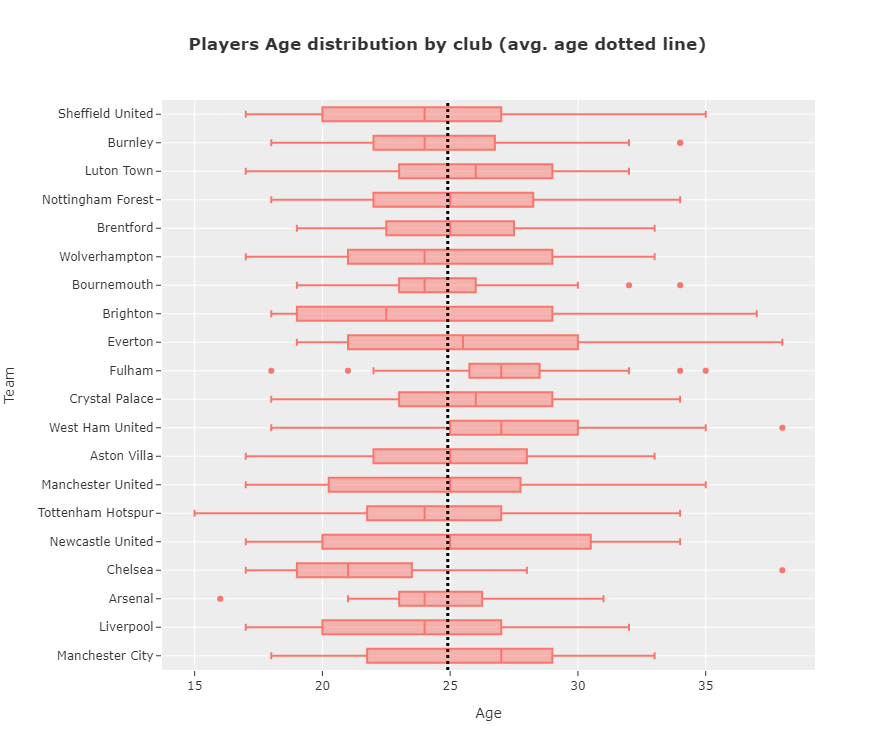

In [5]:
age_avg=stat['Age'].mean()
fig = px.box(stat, y="Team", x="Age",
            title='<b>Players Age distribution by club (avg. age dotted line)<b>',
            width=750,height=750,template='ggplot2')
fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)
# fig.update_layout( yaxis={'categoryorder':'total descending'})
iplot(fig)

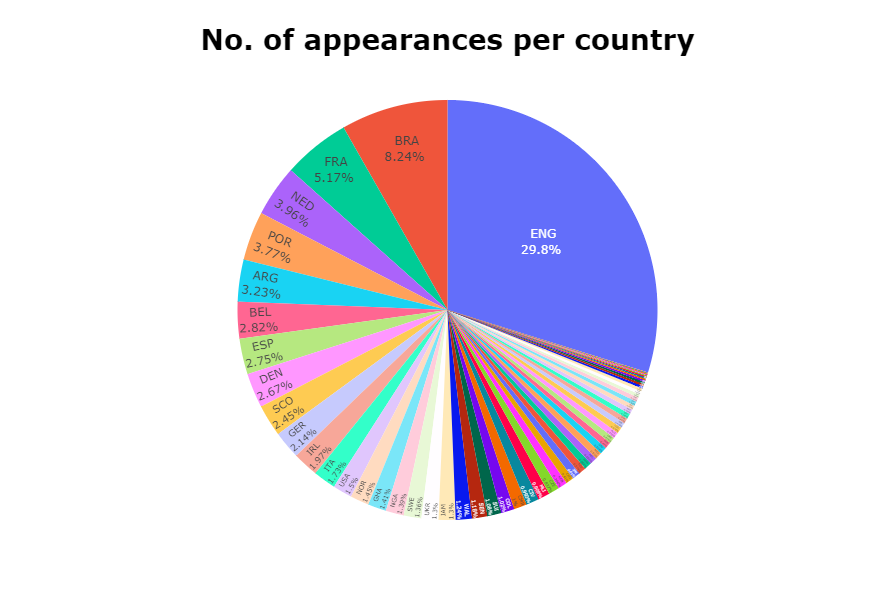

In [6]:

fig = px.pie(stat,
             values='Starts',
             names='Nation',
             title='Countries represented in the EPL by number of appearances',
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='<b> No. of appearances per country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28,),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
iplot(fig)

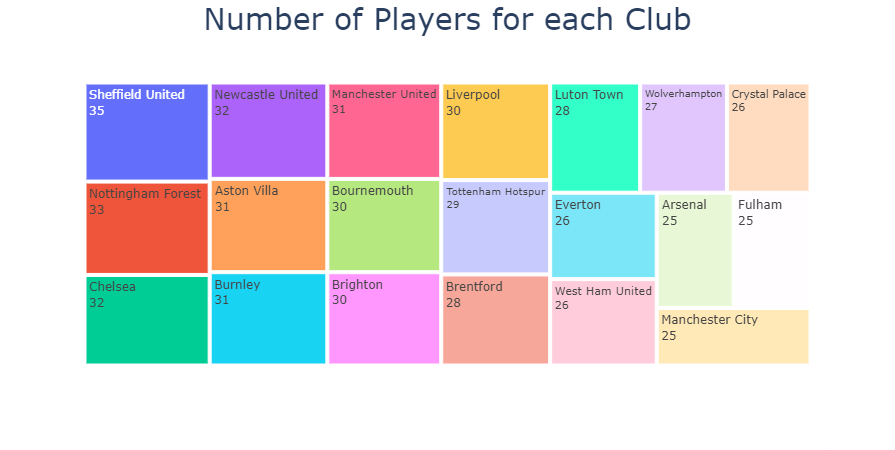

In [7]:
Number_of_Players = stat.groupby(pd.Grouper(key='Team')).size().reset_index(name='count')
fig = px.treemap(Number_of_Players, path=['Team'], values='count')
fig.update_layout(title_text='Number of Players for each Club',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

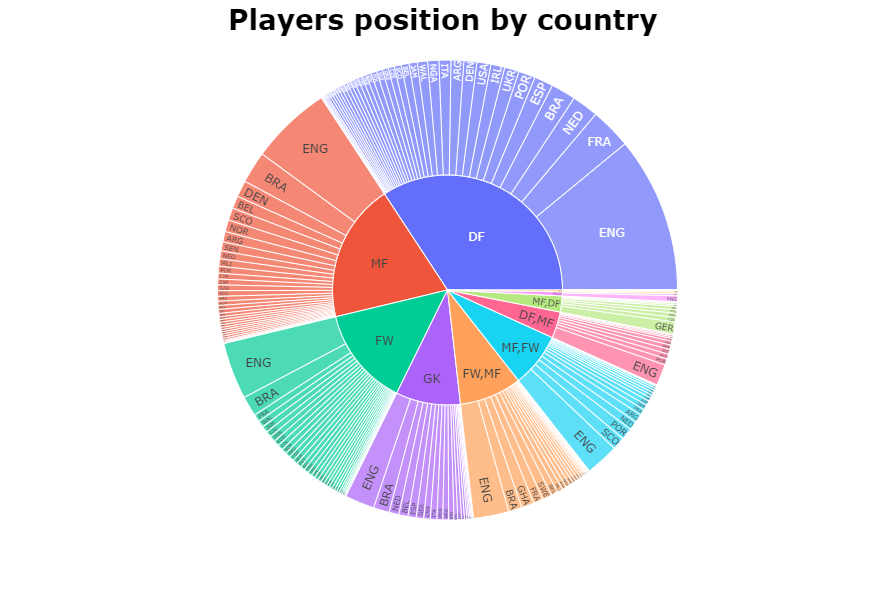

In [8]:

fig = px.sunburst(stat, 
                   path=['Pos', 'Nation'], 
                   values='Starts', 
                 )
fig.update_layout(title_text='<b>Players position by country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28,),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
iplot(fig)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



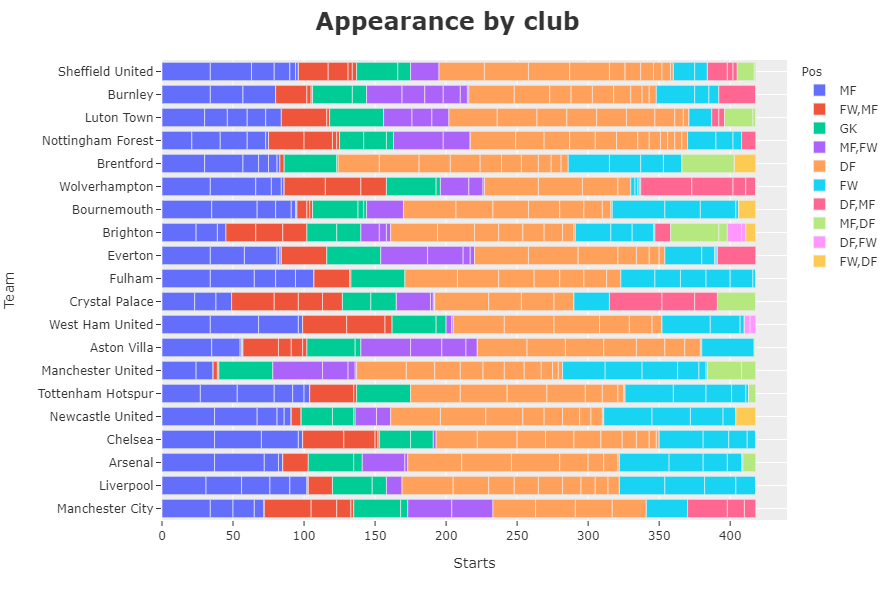

In [9]:
fig = px.bar(stat, y="Team", x="Starts",color='Pos',
             hover_data=["Player"],
             width=750, 
             height=600,
             )
fig.update_layout(
             template='ggplot2',
             title='<b>Appearance by club<b>',
             titlefont={'size':24},
)
iplot(fig)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



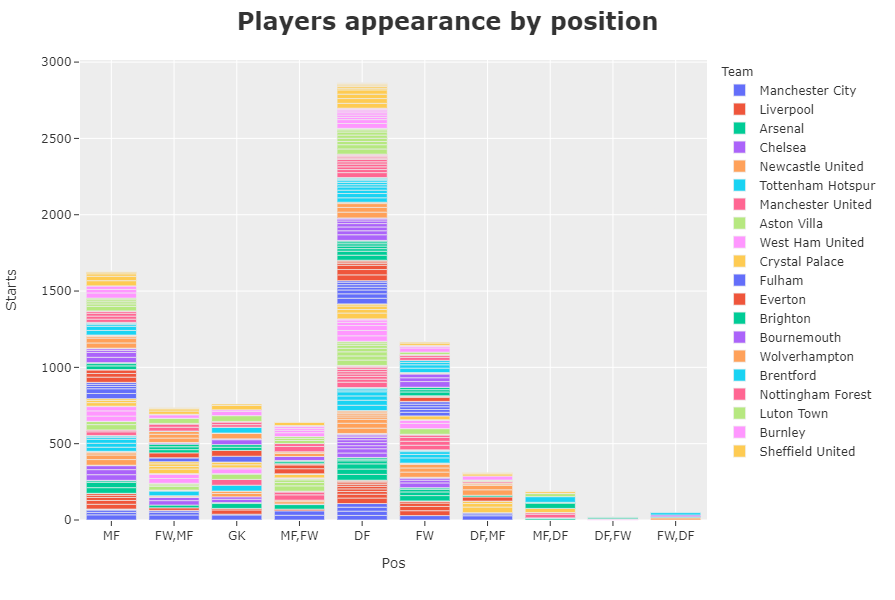

In [10]:
fig = px.bar(stat, x="Pos", y="Starts",color='Team',
             hover_data=["Player"],
             width=750, height=600,)
fig.update_layout(
             template='ggplot2',
             title='<b>Players appearance by position<b>',
             titlefont={'size':24})
iplot(fig)

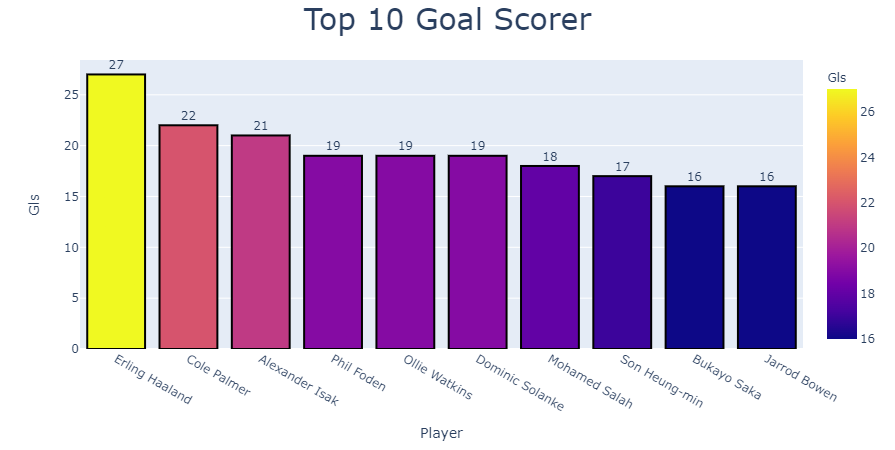

In [11]:
fig = px.bar(data_frame=stat.nlargest(10, 'Gls')[['Player', 'Gls']],
                 x='Player', y='Gls', color='Gls', text='Gls')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 10 Goal Scorer',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

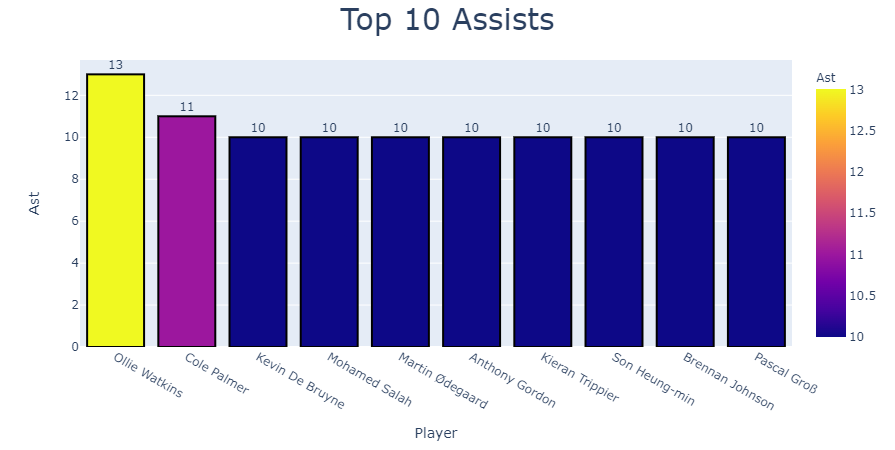

In [12]:
fig = px.bar(data_frame=stat.nlargest(10, 'Ast')[['Player', 'Ast']],
                 x='Player', y='Ast', color='Ast', text='Ast')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 10 Assists',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

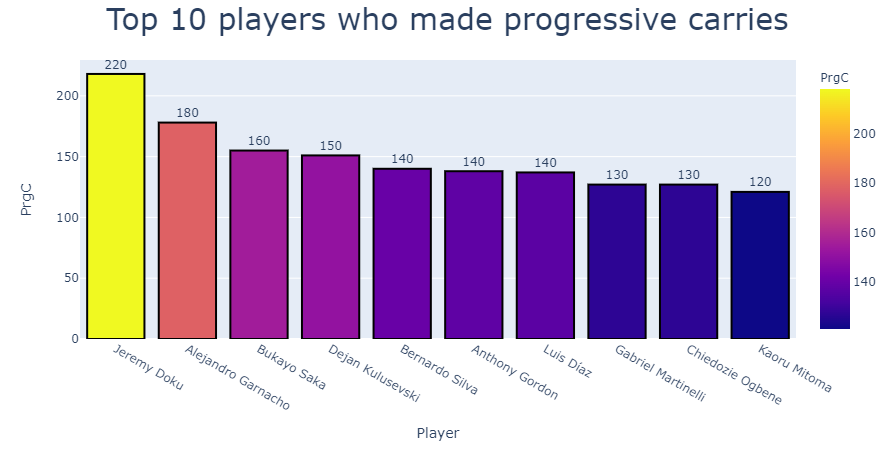

In [32]:
fig = px.bar(data_frame=stat.nlargest(10, 'PrgC')[['Player', 'PrgC']],
                 x='Player', y='PrgC', color='PrgC', text='PrgC')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 10 players who made progressive carries',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

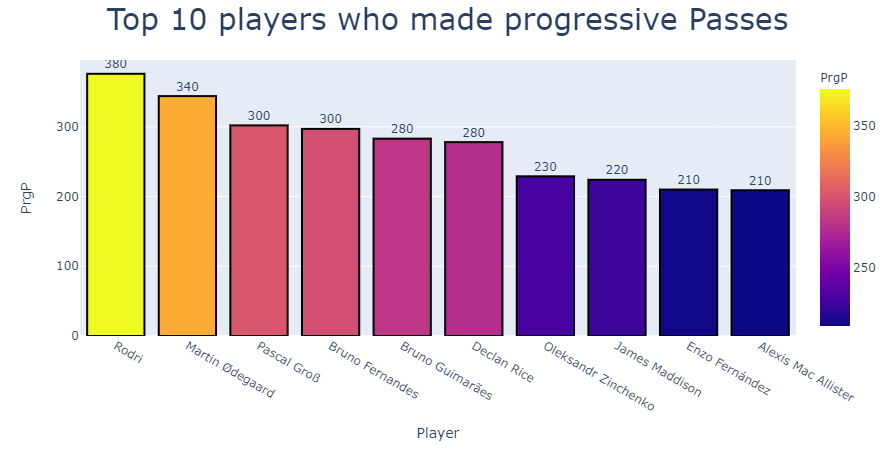

In [33]:
fig = px.bar(data_frame=stat.nlargest(10, 'PrgP')[['Player', 'PrgP']],
                 x='Player', y='PrgP', color='PrgP', text='PrgP')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 10 players who made progressive Passes',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

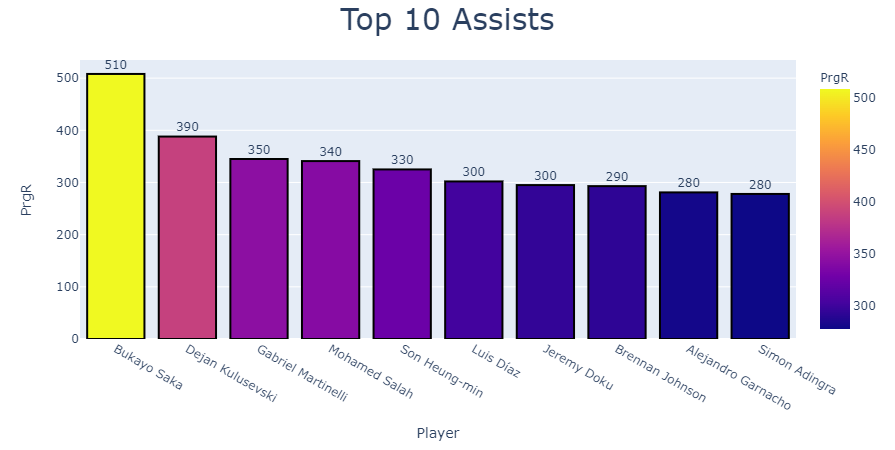

In [31]:
fig = px.bar(data_frame=stat.nlargest(10, 'PrgR')[['Player', 'PrgR']],
                 x='Player', y='PrgR', color='PrgR', text='PrgR')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 10 players who made progressive ',  
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

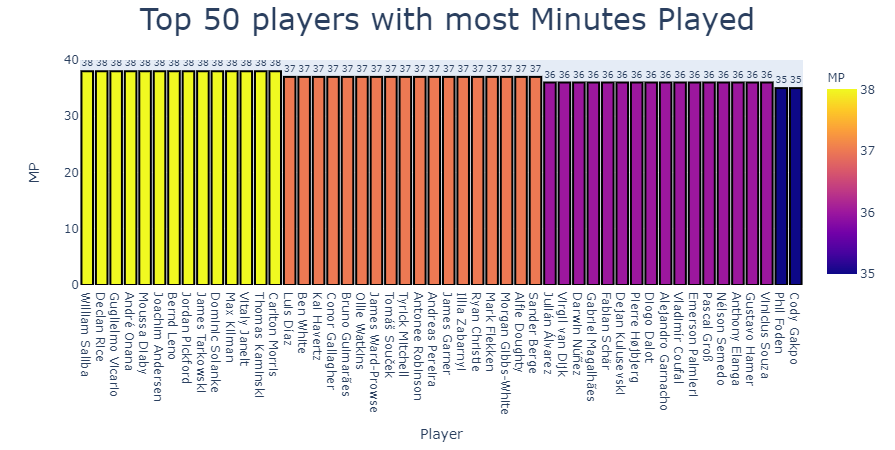

In [14]:
fig = px.bar(data_frame=stat.nlargest(50, 'MP')[['Player', 'MP']],
                 x='Player', y='MP', color='MP', text='MP')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 50 players with most Minutes Played',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

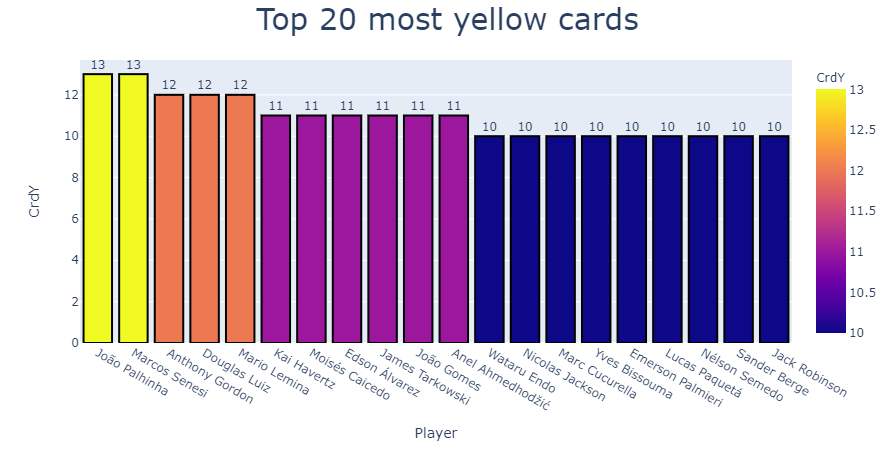

In [15]:
fig = px.bar(data_frame=stat.nlargest(20, 'CrdY')[['Player', 'CrdY']],
                 x='Player', y='CrdY', color='CrdY', text='CrdY')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 20 most yellow cards',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

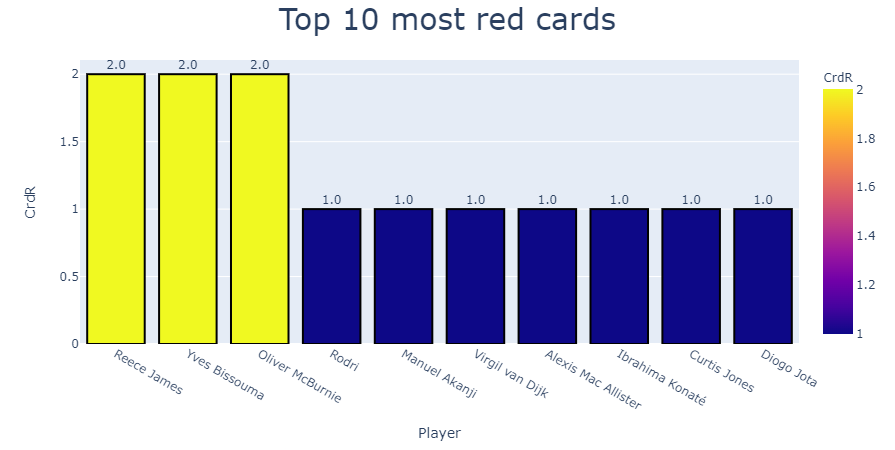

In [16]:
fig = px.bar(data_frame=stat.nlargest(10, 'CrdR')[['Player', 'CrdR']],
                 x='Player', y='CrdR', color='CrdR', text='CrdR')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 10 most red cards',  # Main title for the project
                      title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

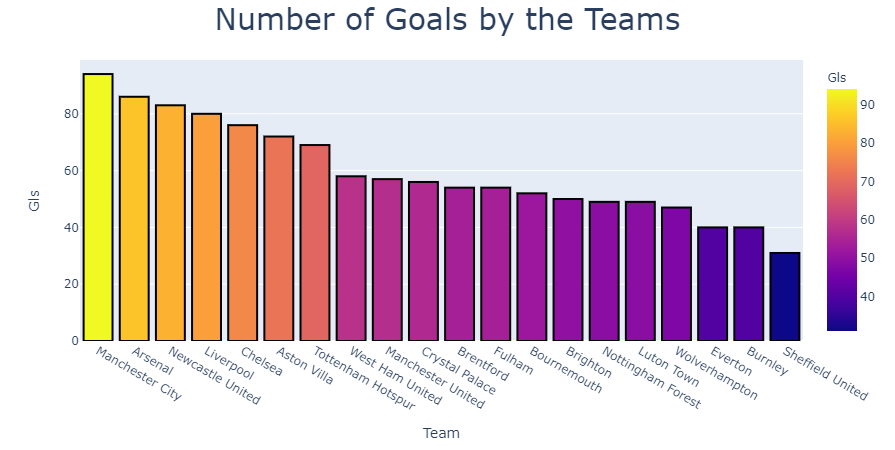

In [17]:
goals_by_team = stat['Gls'].groupby(stat['Team']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=goals_by_team, x=goals_by_team.index, y='Gls', color='Gls')
fig.update_layout(title_text='Number of Goals by the Teams',
                  title_x=0.5, title_font=dict(size=30))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

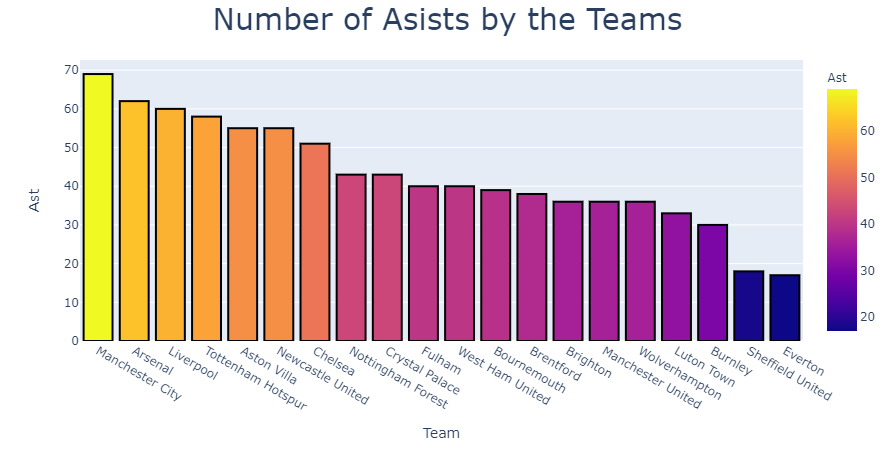

In [18]:
asists_by_team = stat['Ast'].groupby(stat['Team']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=asists_by_team, x=asists_by_team.index, y='Ast', color='Ast')
fig.update_layout(title_text='Number of Asists by the Teams',
                  title_x=0.5, title_font=dict(size=30))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

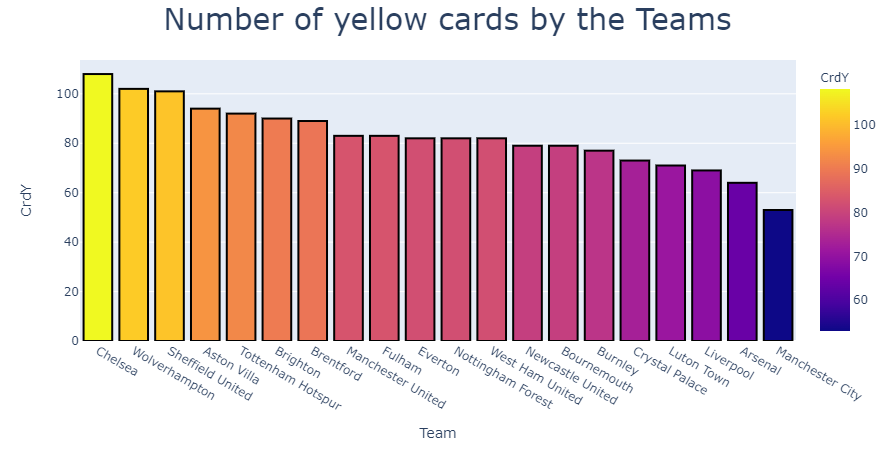

In [19]:
yc_by_team = stat['CrdY'].groupby(stat['Team']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=yc_by_team, x=yc_by_team.index, y='CrdY', color='CrdY')
fig.update_layout(title_text='Number of yellow cards by the Teams',
                  title_x=0.5, title_font=dict(size=30))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

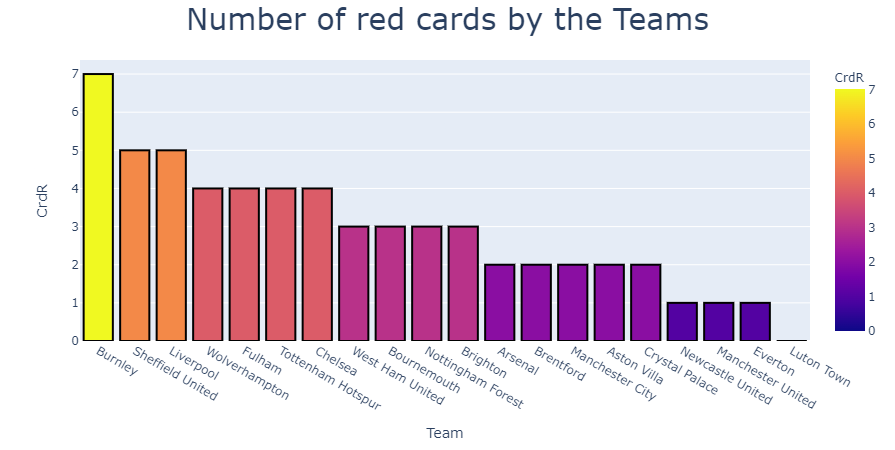

In [20]:
rc_by_team = stat['CrdR'].groupby(stat['Team']).sum().sort_values(ascending=False).to_frame()
fig = px.bar(data_frame=rc_by_team, x=rc_by_team.index, y='CrdR', color='CrdR')
fig.update_layout(title_text='Number of red cards by the Teams',
                  title_x=0.5, title_font=dict(size=30))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
target = 'Gls'
features = ['Age', 'MP', 'Starts', '90s', 'Ast', 'xG', 'npxG', 'PrgC', 'PrgP']
X = stat[features]
y = stat[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
numerical_features = ['Age', 'MP', 'Starts', '90s', 'Ast', 'xG', 'npxG', 'PrgC', 'PrgP']
categorical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [25]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [26]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'MP', 'Starts', '90s',
                                                   'Ast', 'xG', 'npxG', 'PrgC',
                                                   'PrgP']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [27]:
y_pred = model.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 0.7813793103448274
RMSE: 1.5188510857518767
R^2: 0.8780547920881538
